### Load MNIST dataset

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# scikit-learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# common imports
import numpy as np

In [4]:
# import function to scikit-learn datasets
from sklearn.datasets import fetch_openml

# load specified dataset (MNIST)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# print type of dataset
type(mnist)

sklearn.utils.Bunch

In [5]:
X, y = mnist["data"], mnist["target"]

### Fix labels

In [113]:
# import plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import isqrt, sqrt

In [7]:
# convert string labels to int
y = y.astype(np.uint8)

In [126]:
# function to quickly plot an image
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

### Prepare data for machine learning

### Identify Train Set and Test Set

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

print(f"X_train: {len(X_train)}, {X_train.shape}")
print(f"X_test: {len(X_test)}, {X_test.shape}")
print(f"y_train: {len(y_train)}, {y_train.shape}")
print(f"y_test: {len(y_test)}, {y_test.shape}")

X_train: 56000, (56000, 784)
X_test: 14000, (14000, 784)
y_train: 56000, (56000,)
y_test: 14000, (14000,)


## Pipeline Declaration

In [140]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, Binarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, accuracy_score

n_neighbors = 3
n95_components = 0.95
n99_components = 0.99

In [143]:
names = ['scaler', 
         'minmax', 
         'maxabs',
         'bin'
        ]

classifiers = [
    Pipeline([('scaler', StandardScaler())]),
    Pipeline([('minmax', MinMaxScaler())]),
    Pipeline([('maxabs', MaxAbsScaler())]),
    Pipeline([('bin', Binarizer())]),
]

len(names), len(classifiers)

(4, 4)

# Crossvalidation

In [123]:
def cv(num):
    name = names[num]
    clf = classifiers[num]
    i = 10000
    _X_train = clf.fit_transform(X_train, y_train)
    print(y_train[i])
    plot_digit(_X_train[i])
    return _X_train[i]

3


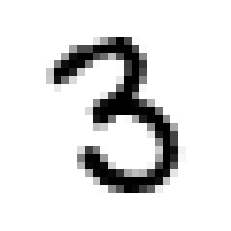

In [128]:
i = 10000
print(y_train[i])
plot_digit(X_train[i])

3


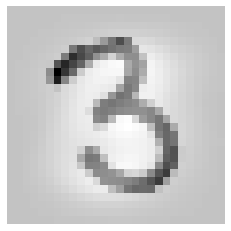

In [132]:
a = cv(0)

3


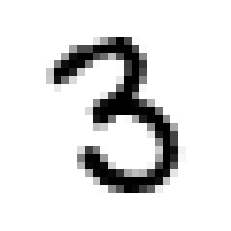

In [133]:
a = cv(1)

3


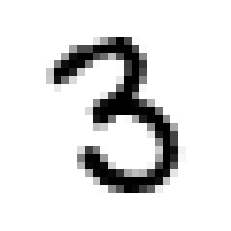

In [134]:
a = cv(2)

3
3


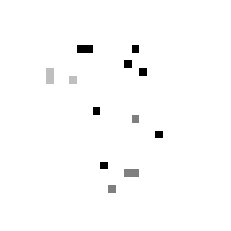

In [137]:
plot_digit(cv(2)-cv(1))

3


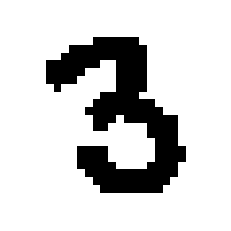

In [145]:
a = cv(3)